mean 149.21615384615393
standard deviation 1.764350124251631
Outliers_min 144.0
Outliers_max 154.0


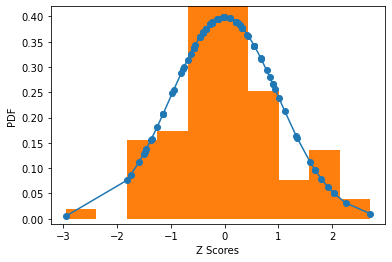

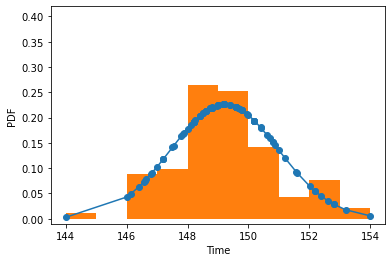

meand, std: 149.22101123595507 1.6186456017743405


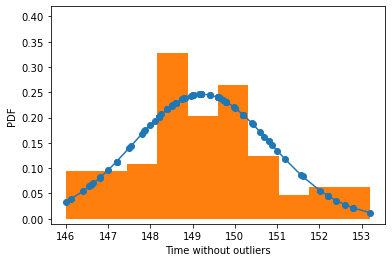

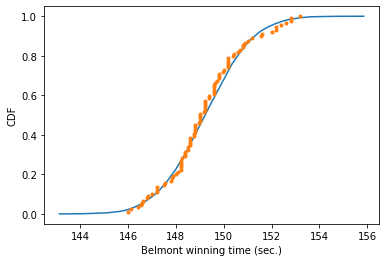

Probability of besting Secretariat: 0.000616


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
%matplotlib inline
from datetime import datetime

#np.set_printoptions(threshold=sys.maxsize)

#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

belmont = pd.read_csv("belmont.csv", sep = ';', decimal= ",") # use delimeters, try to check if all data are available

belmont

# find max value in the column
outlier_max_column = belmont["Time"]
outlier_max = outlier_max_column.max()
outlier_max

Year = belmont["Year"]

belmont["Miliseconds"] = belmont.Miliseconds.astype(float)
Time = belmont["Miliseconds"]
Time


#_ = plt.plot(Time, Year, '.')
#_ = plt.xlabel('belmont time in min')
#_ = plt.ylabel('Year')

mu_mean = np.mean(Time)
sigma_std = np.std(Time)
print('mean', mu_mean)
print('standard deviation', sigma_std)

# calculate Z-scores to find outliers
#Task: calc outliers using another methods see reccomandations

Z_scores = (Time - mu_mean)/sigma_std

Outliers_min = Z_scores.min()
# 1973 and 1970 years should be deleted from analysis

Outliers_max = Z_scores.max()
print('Outliers_min',Outliers_min*sigma_std + mu_mean)
print('Outliers_max', Outliers_max*sigma_std + mu_mean)

h_1 = sorted(Z_scores)  #sorted

fit = stats.norm.pdf(h_1, np.mean(h_1), np.std(h_1))  #this is a fitting indeed

pl.plot(h_1,fit,'-o')

pl.hist(h_1,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Z Scores')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#Task 1: convert to array and print the whole array, combine two columns Time and Z-scores and Years and print as a table
#Task 2: delete outliers from the Time and print

#print(Time,Z_scores)

#  a normal distribution with outliers
h = sorted(Time)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

#a normal distribution without outliers

Time_without = [148.51, 146.65, 148.52, 150.7 , 150.42, 150.88, 151.57, 147.54,
       149.65, 148.74, 147.86, 148.75, 147.5, 148.26, 149.71, 146.56,
       151.19, 147.88, 149.16, 148.82, 148.96, 152.02, 146.82, 149.97,
       146.13, 148.1 , 147.2 , 146, 146.4, 148.2 , 149.8 , 147,
       147.2 , 147.8 , 148.2 , 149.  , 149.8 , 148.6 , 146.8 , 149.6 ,
       149.  , 148.2 , 149.2 , 148.  , 150.4 , 148.8 , 147.2 , 148.8 ,
       149.6 , 148.4 , 148.4 , 150.2 , 148.8 , 149.2 , 149.2 , 148.4 ,
       150.2 , 146.6 , 149.8 , 149.  , 150.8 , 148.6 , 150.2 , 149.  ,
       148.6 , 150.2 , 148.2 , 149.4 , 150.8 , 150.2 , 152.2 , 148.2 ,
       149.2 , 151.  , 149.6 , 149.6 , 149.4 , 148.6 , 150.  , 150.6 ,
       149.2 , 152.6 , 152.8 , 149.6 , 151.6 , 152.8 , 153.2 , 152.4 ,
       152.2 ]
type(Time_without)
# Compute mean and standard deviation: mu, sigma
mu = np.mean(Time_without)
sigma = np.std(Time_without)

print('meand, std:', mu, sigma)

h = sorted(Time_without)  #sorted

fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h,density=True)      #use this to draw histogram of your data

              
# Make a legend, set limits and show plot
_ = plt.xlabel('Time without outliers')
_ = plt.ylabel('PDF')
plt.ylim(-0.01, 0.42)
plt.show()

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(Time_without)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

# to find out if it is possible to hit Secretariats record
# Take a million samples out of the Normal distribution: samples
samples = np.random.normal(mu, sigma, size=1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144) / len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

In [3]:
def timeToMs(time):
    datetime_from_time = datetime.strptime(time, '%M:%S.%f')
    milliseconds = (datetime_from_time.minute * 60 + datetime_from_time.second) * 1000
    milliseconds = milliseconds + datetime_from_time.microsecond / 1000
    return milliseconds

timeToMs(belmont['Time'][0])


#Millisekunden ausgeben
arrString = belmont["Time"].to_numpy()
arrInt = np.empty(arrString.size, dtype=int)
for x in range(arrString.size):
    arrInt[x] = timeToMs(arrString[x])
print(arrInt)


# Eine andere Möglichkeit wäre es die Werte in Time in einen String umzuwandeln, diesen aufzuteilen und die jeweiligen Teile in ein Int umzuwandeln und dann selbst zu rechnen

[148510 146650 148520 150700 150420 150880 151570 147540 149650 148740
 147860 148750 147500 148260 149710 146560 151190 147880 149160 148820
 148960 152020 146820 149970 146130 148100 147200 146000 146400 148200
 149800 147000 147200 147800 148200 149000 149800 148600 146800 149600
 149000 148200 149200 144000 148000 150400 154000 148800 147200 148800
 149600 148400 148400 150200 148800 149200 149200 148400 150200 146600
 149800 149000 150800 148600 150200 149000 148600 150200 148200 149400
 150800 150200 152200 148200 149200 151000 149600 149600 149400 148600
 150000 150600 149200 152600 152800 149600 151600 152800 153200 152400
 152200]


In [8]:
#Mean mit Ausreißer
mean = np.mean(arrInt)
mean = round(mean, 2)
print(mean)


#Median mit Ausreißer
median = np.median(arrInt)
print(median)

#Variance mit Ausreißer
variance_np = np.var(arrInt)
variance_np = round (variance_np, 2)
print(variance_np)

#Zwischenschritt
variance = np.var(arrInt)

#Standartabweichung mit Ausreißer
sa = np.sqrt(variance)
sa = round(sa, 2)
print(sa)

149216.15
149000.0
3112931.36
1764.35


In [17]:
#Ausreißer über IQR
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_bound = Q1 - (1.5 * IQR)
 upper_bound = Q3 + (1.5 * IQR)
 return lower_bound,upper_bound

In [18]:
#Ausreißer finden
lowerbound,upperbound = outlier_treatment(arrInt)
(arrInt < lowerbound) | (arrInt > upperbound)
print(arrInt.size)

91


In [19]:
#Ausreißer Löschen
print(arrInt.size)
arrInt = arrInt[(arrInt > lowerbound) & (arrInt < upperbound)]
print(arrInt.size)


91
88


In [ ]:
#Es wurden 3 Ausreißer gelöscht

In [20]:
#Mean ohne Ausreißer
mean = np.mean(arrInt)
mean = round(mean, 2)
print(mean)


#Median ohne Ausreißer
median = np.median(arrInt)
print(median)

#Variance ohne Ausreißer
variance_np = np.var(arrInt)
variance_np = round (variance_np, 2)
print(variance_np)

#Zwischenschritt
variance = np.var(arrInt)

#Standartabweichung ohne Ausreißer
sa = np.sqrt(variance)
sa = round(sa, 2)
print(sa)

149175.8
149000.0
2467828.91
1570.93


[148200. 149000. 150200. 152565.]


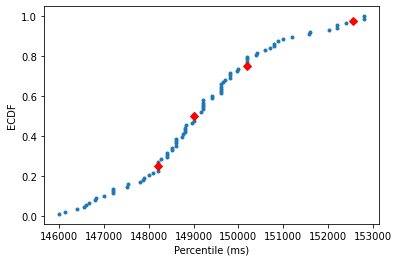

In [21]:
# Specify array of percentiles: percentiles
percentiles = np.array([0.25, 0.5, 0.75, 0.975])

# Compute percentiles: ptiles_vers
percentiles_aar = np.quantile(arrInt, percentiles)

x_aar, y_aar = ecdf(arrInt)

print(percentiles_aar)

#calc percentiles for ecdf of Milliseconds
# Plot the ECDF
_ = plt.plot(x_aar, y_aar, '.')
_ = plt.xlabel('Percentile (ms)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red x's
_ = plt.plot(percentiles_aar, percentiles, marker='D', color='red',
         linestyle='none')

# Show all on the same  plot
plt.show()